# 5. Remote access to LESTA and job management with SLURM

Some time our personal computers are not powerful enough to handle very heavy tasks, or if they can they will take a huge amount of time to complete the calculations. The department of astronomy gives its resources for the students such that we can use the cluster LESTA to run heavy tasks. First we need to know how to access to LESTA and the how to run jobs in the cluster.

After you get an account to lesta the first step is open a terminal in your computer. To access a computer remotly we use `ssh` protocol (Secure SHell). The most basi way to use `ssh` is by considering the following structure 

```bash
ssh username@adress_of_the_remote_computer
```
Then the process may require a password.

For lesta your `username` is the one from UNIGE (the short one you get to access moodle) and the password linked to that password.

I will use my `username` and the adress of the observatory network is `login01.astro.unige.ch`, then to access it I will need to type in the terminal

```bash
ssh username@login01.astro.unige.ch
```

The previous step will give you access to the observatory network. 

Are we inside LESTA now? No.

For security reasons the observatory requires two logins to access lesta, we already did one login then we need to do one more step. As we are inside the observatory network we can go to LESTA using the following command

```bash
ssh -Y lesta01
```

After doing this step now we are inside lesta.

Are able to run stuff inside LESTA now? No, well yes, but no! 

### $\bullet$ Setup for LESTA

To be able to run stuff in lesta we need to setup the packages that we are going to use. The basic setup is to use the `astro` setup. If this is not suficient then you can check the available packages inside LESTA at https://www.astro.unige.ch/wiki/IT/doc/astroge/lesta

The `astro` setup is  activated if we tun the following lines after we are inside LESTA

```
module use /astro/soft/modulefiles/
module unuse /etc/modulefiles
module add astro
```

### $\bullet$ What if I need to install software that is not available in LESTA?

The users does not have permission to instal software inside the whole LESTA, but only in their user accounts. This is also the case for `python` modules. 

For example if we want to install the `python` modules called `cosmic` with `pip` we need to tell to the installer that such module must be installed only in our session. Such action is defined with the option `--user` as

```bash
pip install --user cosmic
```

In case of a given program then if the installer has te option to perform the installation only in your user session then you must select that option, otherwise you are not going to be able to install the program. If you need something to be installed in the whole cluster then you shoult countact the LESTA support: astro-it-admin@unige.ch

Most of the times you do not need to have something in the whole cluster, so please try to install all your programs in your user session.

### $\bullet$ Where should I run stuff in LESTA?

Your user session consists on a:
- Home directory: `/home/astro/username`, you can run stuff here but you only have 10GB of storage
- A directory to run stuff: `/hpcstorage/username`, if you have permission to run stuff inside LESTA then you will be able to access this directory. Here you have a larger storage (~200GB) and is saver to run and save your data here.

So please go first to `/hpcstorage/username` to run your stuff.

### $\bullet$ Running stuff in LESTA: job management with SLURM

As LESTA is a computer available for a set of users that run codes in parallel and handle a large amount of data, ir requires a way to stay safe even if all this heavy work is performed at the same time.

To manage the jobs lesta uses SLURM, in practical terms is a software that allows to control the tasks that are running in LESTA, gives an schedule for all future tasks and keeps the computer safer during the heavy work.

For example, you have an script calles `helloworld.py` and you want to run it inside LESTA. The you **must not run `python helloworld.py` in the terminal**. To run the script you need to make a `submission script`, iside this script you will tell how much memory you need, how many processors and how much time you will use the cluster for the run.

A SLURM submission script has an extension of `.sbatch` or `.s`. Let's see a general template for this script:

```bash
#!/bin/bash
#SBATCH --mail-user=Jaime.Roman@etu.unige.ch
#SBATCH --job-name=example
#SBATCH --output=screenlog_example.out
#SBATCH --error=screenlog_example.err
#SBATCH --partition=p4
#SBATCH --ntasks=1
#SBATCH --mem=1000
#SBATCH --time=10:00
#SBATCH --parsable
#SBATCH --cpus-per-task=1

export OMP_NUM_THREADS=1

python helloworld.py
```

Lets see what each line means

### `#!/bin/bash`
This line is tell the job habdler to use the packages loaded in the current terminal to run the job.

### `#SBATCH --mail-user=Jaime.Roman@etu.unige.ch`
This is to define the mail to notify in case something goes wrong with the job.

### `#SBATCH --job-name=example`
This is to define the name of the job, it should be a short string characteristic of the job. We will se the importance of this later.

### `#SBATCH --output=screenlog_example.out`
This is the name of the file where the print outputs of the program will be written. If tou have a `print` in a python script the output of such function will be written here and not in the terminal.

### `#SBATCH --error=screenlog_example.err`
This is the name of the file where all the error messages will be written.

### `#SBATCH --partition=p4`
This is to tell the wich partition you will use to run the script. A partition is a set of cores with some memory and time limitations. By choosing a partition you are selecting the technical requirments of your job. For example in the partition `p4` of LESTA you have:

- 16 Intel Xeon (E5-2640 v3, 2.6GHz) core per node,
- 128GB of RAM per node,
- 32 nodes in total.

All jobs in LESTA have a maximum running time of 3 days.

If you want to use other partition you can see the techinal specs in the folowing table:

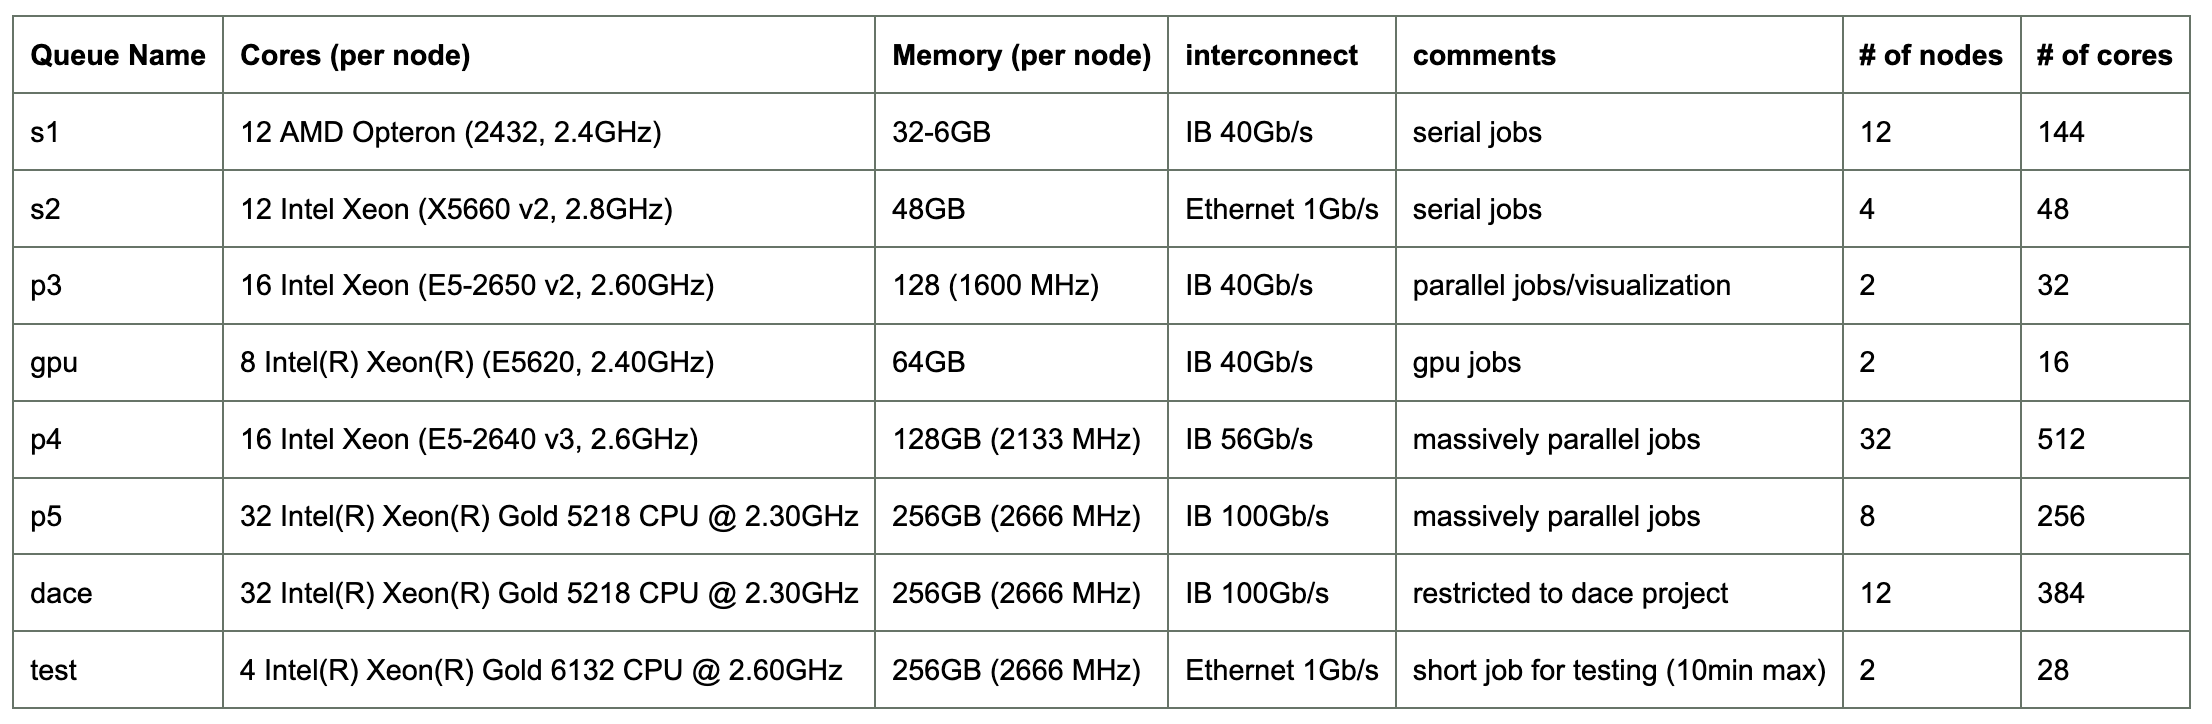

### `#SBATCH --ntasks=1`
This is to tell the number of tasks to perform in the node. Let's set this to `1` most of the times.

### `#SBATCH --mem=1000`
This is to define the amount of RAM in MB to use in the run, here we are asking to use 1GB.

### `#SBATCH --time=10:00`
This is define how much time we will use for the run. Here we ask for 10 minuts, if we want to as for 2 hours then we have to set `#SBATCH --time=2:00:00`.

### `#SBATCH --parsable`
This is to tell the handler to write only the job ID and the error in screen while running.

### `#SBATCH --cpus-per-task=1`
This is define how many core we need per task, we set this as `1`.

### `export OMP_NUM_THREADS=1`
This is define the number of threads per task and is important to use this if you are using parallel computations, we set this as `1`.

### `python helloworld.py`
This last line is just an example, at the end you just put the line to run the script you need.

## Ex. Run a python script that prints `Hello world` inside LESTA using SLURM.
___

### $\bullet$ Download data from LESTA

The procedure to use depends on where is your data in the case of LESTA.

**If your data is inside `/home/astro/username`**

In this case, as `/home/astro/username` is a shared folder between the first `login` and `LESTA` we can use the `scp` procedure (Secure CoPy) as

```bash
scp username@login01.astro.unige.ch:/home/astro/username/remote-path-of-the-file local-path-to-paste-the-data
```


**If your data is inside `/hpcstorage/username`**

This procedure needs two steps, we first need to open a `ssh tunnel` to LESTA with 

```
ssh -L 4022:lesta01:22 username@login01.astro.unige.ch -N
```
After we open the tunnel we can use the `scp` but to a `localhost` (as there is our tunnel from our local computer to LESTA)


```bash
scp username@localhost:/hpcstorage/username/remote-path-of-the-file local-path-to-paste-the-data
```



### $\bullet$ Saving time on typing

At this point you saw that the `shell` commands are getting bigger. To sake time on typing we are going to deffine `system variable` to call insteaf of writing the whole strings. 

Let's go to your local home folder 
```bash
cd
```

and open the `.bashrc` with `vim` or any text editor:
```bash
vim .bashrc
```

Here we can define system variables that will be available in any terminal you open.

Let's define the following variables

```bash
#My variables
export LOGASTRO=username@login01.astro.unige.ch
export LOGLOCAL=username@localhost
```

Then we save and close the `.bashrc` folder and type :
```bash
source .bashrc
```
If you skip the last step the system variables will not be available unti you restar your computer.



So to copy data from `/home/astro/username` you type now:
```bash
scp ${LOGASTRO}:/home/astro/username/remote-path-of-the-file local-path-to-paste-the-data
```

And for the data in `/hpcstorage/username` you type (after opening the tunnel):


```bash
scp ${LOGLOCAL}:/hpcstorage/username/remote-path-of-the-file local-path-to-paste-the-data
```



We can save more tyme by defining aliases for the access to the first `login` and for the tunnel. Add inside `.bashrc` the following:

```bash 
alias astrolog='ssh username@login01.astro.unige.ch'
alias tunnel-lesta='ssh -L 4022:lesta01:22 username@login01.astro.unige.ch -N'

```

To acces the first login just type `astrolog` and to open the tunnel type `tunnel-lesta`.

___

### $\bullet$ SSH keys

For that we will follow the procedure described in https://docs.google.com/document/d/108VybO9lh8e8jgvUDTvKLz8SxCv4Ci6ig152FYHIs8I/edit 

By Daniela Huppenkothen